# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
! pip install citipy

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [3]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 598


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=" + weather_api_key

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = city_url = url + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
        #print(city_url + city)
        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

        
    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | callao
Processing Record 2 of Set 1 | taiohae
City not found. Skipping...
Processing Record 3 of Set 1 | waitangi
Processing Record 4 of Set 1 | brookings
Processing Record 5 of Set 1 | puerto san carlos
City not found. Skipping...
Processing Record 6 of Set 1 | albany
Processing Record 7 of Set 1 | anadyr
Processing Record 8 of Set 1 | port-aux-francais
Processing Record 9 of Set 1 | bethel
Processing Record 10 of Set 1 | dakoro
Processing Record 11 of Set 1 | ambon
Processing Record 12 of Set 1 | puerto ayora
Processing Record 13 of Set 1 | mejit
Processing Record 14 of Set 1 | ust-nera
Processing Record 15 of Set 1 | bredasdorp
Processing Record 16 of Set 1 | saacow
Processing Record 17 of Set 1 | lebu
Processing Record 18 of Set 1 | georgetown
Processing Record 19 of Set 1 | vingt cinq
City not found. Skipping...
Processing Record 20 of Set 1 | mandalgovi
Processing Record 21 of Set 1 | lockw

Processing Record 39 of Set 4 | bodelshausen
Processing Record 40 of Set 4 | maubara
City not found. Skipping...
Processing Record 41 of Set 4 | rocky mountain house
Processing Record 42 of Set 4 | lospalos
Processing Record 43 of Set 4 | zhaqsy
Processing Record 44 of Set 4 | kosciuszko national park
City not found. Skipping...
Processing Record 45 of Set 4 | praia da vitoria
Processing Record 46 of Set 4 | coyhaique
Processing Record 47 of Set 4 | aweil
Processing Record 48 of Set 4 | zinjibar
Processing Record 49 of Set 4 | sinop
Processing Record 0 of Set 5 | mugia
Processing Record 1 of Set 5 | hamilton
Processing Record 2 of Set 5 | xilin hot
Processing Record 3 of Set 5 | esperanza
Processing Record 4 of Set 5 | pursat
Processing Record 5 of Set 5 | lima
Processing Record 6 of Set 5 | olbia
Processing Record 7 of Set 5 | carnarvon
Processing Record 8 of Set 5 | aykhal
Processing Record 9 of Set 5 | lubang
Processing Record 10 of Set 5 | al qadarif
Processing Record 11 of Set 5 |

City not found. Skipping...
Processing Record 29 of Set 8 | kapa'a
Processing Record 30 of Set 8 | pocahontas
Processing Record 31 of Set 8 | yorkton
Processing Record 32 of Set 8 | robore
Processing Record 33 of Set 8 | salinas
Processing Record 34 of Set 8 | kulia village
City not found. Skipping...
Processing Record 35 of Set 8 | richards bay
Processing Record 36 of Set 8 | ola
Processing Record 37 of Set 8 | jyllinge
Processing Record 38 of Set 8 | fort bragg
Processing Record 39 of Set 8 | hadibu
Processing Record 40 of Set 8 | zaozersk
Processing Record 41 of Set 8 | nizhniy odes
Processing Record 42 of Set 8 | beyneu
Processing Record 43 of Set 8 | kashgar
Processing Record 44 of Set 8 | enewetak
Processing Record 45 of Set 8 | saint-philippe
Processing Record 46 of Set 8 | island harbour
Processing Record 47 of Set 8 | barra de santo antonio
Processing Record 48 of Set 8 | boguchar
Processing Record 49 of Set 8 | crane
Processing Record 0 of Set 9 | handan
Processing Record 1 o

Processing Record 17 of Set 12 | champerico
Processing Record 18 of Set 12 | oistins
Processing Record 19 of Set 12 | merizo village
Processing Record 20 of Set 12 | coeur d'alene
Processing Record 21 of Set 12 | dzhankoy
Processing Record 22 of Set 12 | castillos
Processing Record 23 of Set 12 | la tuque
Processing Record 24 of Set 12 | belozersk
Processing Record 25 of Set 12 | dul'durga
Processing Record 26 of Set 12 | 'ajab shir
City not found. Skipping...
Processing Record 27 of Set 12 | syktyvkar
Processing Record 28 of Set 12 | gombong
Processing Record 29 of Set 12 | gamla uppsala
Processing Record 30 of Set 12 | freetown
Processing Record 31 of Set 12 | porto seguro
Processing Record 32 of Set 12 | chicoana
Processing Record 33 of Set 12 | corbelia
Processing Record 34 of Set 12 | tres lagoas
Processing Record 35 of Set 12 | egilsstadir
Processing Record 36 of Set 12 | kuanda
Processing Record 37 of Set 12 | gaspar
Processing Record 38 of Set 12 | juegang
Processing Record 39 

In [5]:
# Convert the cities weather data into a Pandas DataFrame

city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          569
Lat           569
Lng           569
Max Temp      569
Humidity      569
Cloudiness    569
Wind Speed    569
Country       569
Date          569
dtype: int64

In [6]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,callao,-12.0667,-77.1500,26.16,69,0,6.17,PE,1681854503
1,waitangi,-43.9535,-176.5597,17.12,85,100,4.02,NZ,1681854775
2,brookings,44.3114,-96.7984,16.21,34,0,11.32,US,1681854522
3,albany,42.6001,-73.9662,9.77,52,100,0.45,US,1681854642
4,anadyr,64.7500,177.4833,-0.72,80,20,6.71,RU,1681854778


In [7]:
# Export the City_Data into a csv
city_data_df.to_csv("C:/uoft/Challange Uploads/Challange_Uploads/Module 6 Challenge/Starter_Code/output_data/cities.csv", index_label="City_ID")

In [8]:
# Read saved data
city_data_df = pd.read_csv("C:/uoft/Challange Uploads/Challange_Uploads/Module 6 Challenge/Starter_Code/output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,callao,-12.0667,-77.1500,26.16,69,0,6.17,PE,1681854503
1,waitangi,-43.9535,-176.5597,17.12,85,100,4.02,NZ,1681854775
2,brookings,44.3114,-96.7984,16.21,34,0,11.32,US,1681854522
3,albany,42.6001,-73.9662,9.77,52,100,0.45,US,1681854642
4,anadyr,64.7500,177.4833,-0.72,80,20,6.71,RU,1681854778


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

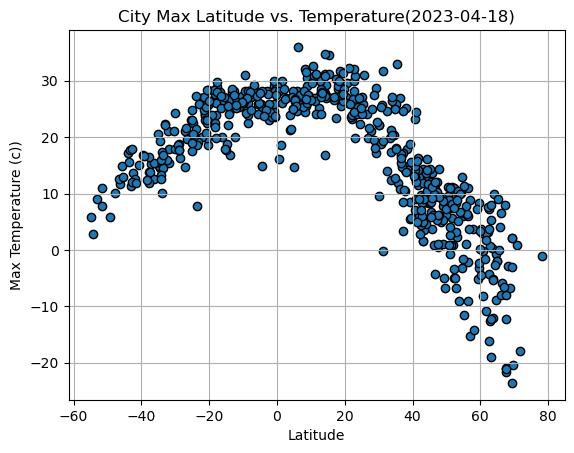

In [9]:
# Build scatter plot for latitude vs. temperature

plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], edgecolor="black")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (c))")
plt.title("City Max Latitude vs. Temperature(%s)"% time.strftime("%Y-%m-%d"))
plt.grid(True)

# Incorporate the other graph properties


# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

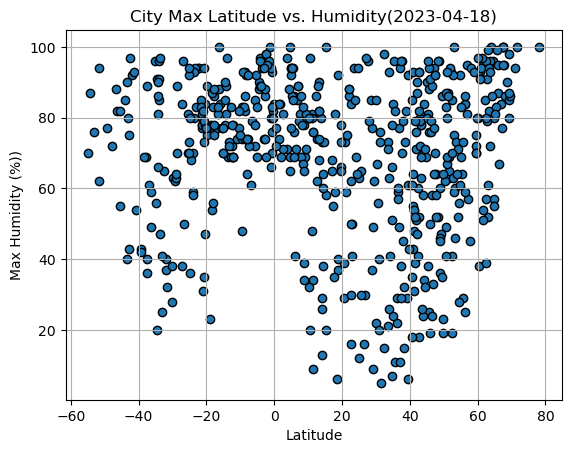

In [10]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], edgecolor="black")
plt.xlabel("Latitude")
plt.ylabel("Max Humidity (%))")
plt.title("City Max Latitude vs. Humidity(%s)"% time.strftime("%Y-%m-%d"))
plt.grid(True)

# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

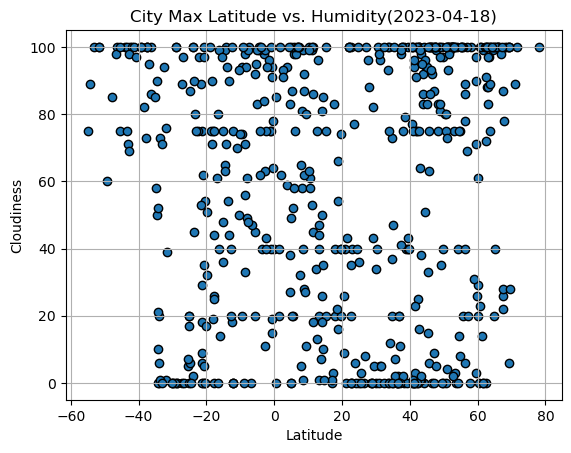

In [11]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], edgecolor="black")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("City Max Latitude vs. Humidity(%s)"% time.strftime("%Y-%m-%d"))
plt.grid(True)

# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

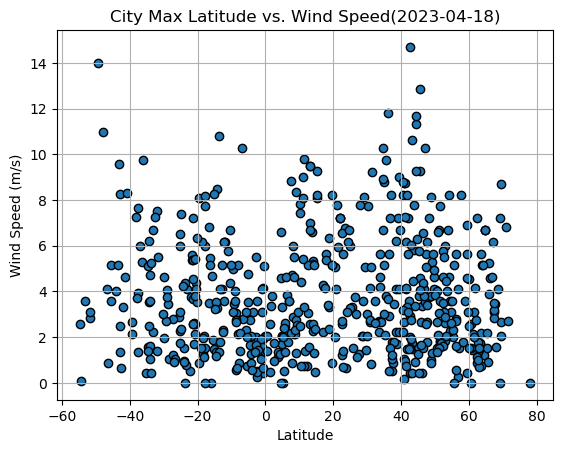

In [12]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], edgecolor="black")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.title("City Max Latitude vs. Wind Speed(%s)"% time.strftime("%Y-%m-%d"))
plt.grid(True)

# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [13]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, title, text_coordinates):

    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    plt.scatter(x_values,y_values, edgecolor="black")
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,text_coordinates,fontsize=15,color="red")
    plt.xlabel('Latitude')
    plt.ylabel(title)
    plt.grid(True)
    print(f"the rvalue is ",(rvalue))
    plt.show()

In [14]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,brookings,44.3114,-96.7984,16.21,34,0,11.32,US,1681854522
3,albany,42.6001,-73.9662,9.77,52,100,0.45,US,1681854642
4,anadyr,64.7500,177.4833,-0.72,80,20,6.71,RU,1681854778
6,bethel,41.3712,-73.4140,13.60,48,0,6.17,US,1681854584
7,dakoro,14.5106,6.7650,29.23,38,10,0.49,NE,1681854779


In [15]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] <0)]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,callao,-12.0667,-77.1500,26.16,69,0,6.17,PE,1681854503
1,waitangi,-43.9535,-176.5597,17.12,85,100,4.02,NZ,1681854775
5,port-aux-francais,-49.3500,70.2167,5.84,77,60,14.01,TF,1681854778
8,ambon,-3.6954,128.1814,25.08,94,40,3.09,ID,1681854779
9,puerto ayora,-0.7393,-90.3518,28.98,93,91,0.45,EC,1681854606


###  Temperature vs. Latitude Linear Regression Plot

the rvalue is  -0.8675799007426687


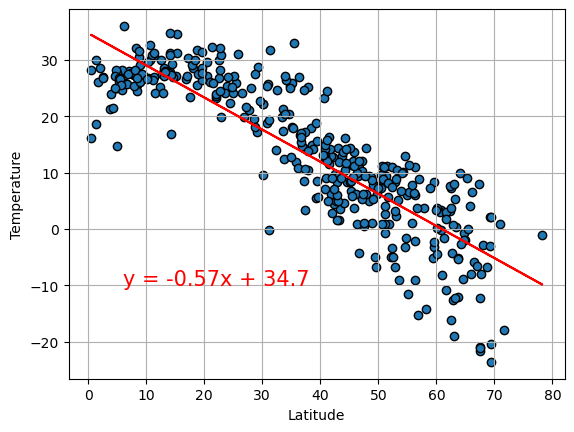

In [16]:
# Linear regression on Northern Hemisphere
x_value=northern_hemi_df["Lat"]
y_value=northern_hemi_df["Max Temp"]
plot_linear_regression(x_value, y_value, "Temperature", (6,-10))

the rvalue is  0.8175040196186704


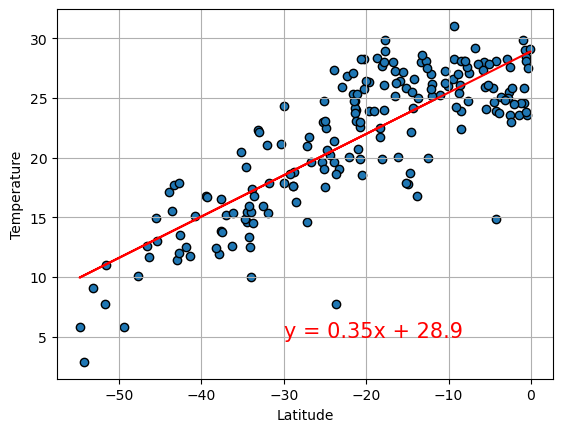

In [17]:
# Linear regression on Southern Hemisphere
x_value=southern_hemi_df["Lat"]
y_value=southern_hemi_df["Max Temp"]
plot_linear_regression(x_value, y_value, "Temperature", (-30,5))

**Discussion about the linear relationship:**  temperature vs latitude corralation for north and south shows that nearly perfect line which means that temp and lat increase and decrease paralel.

### Humidity vs. Latitude Linear Regression Plot

the rvalue is  0.12317834559936688


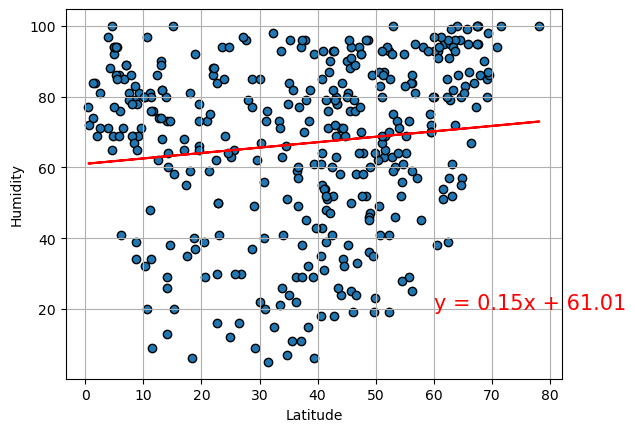

In [18]:
# Northern Hemisphere
x_value=northern_hemi_df["Lat"]
y_value=northern_hemi_df["Humidity"]
plot_linear_regression(x_value, y_value, "Humidity", (60,20))

the rvalue is  0.2902659748842987


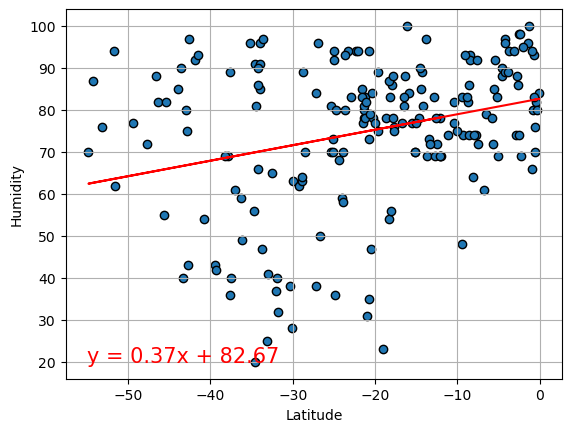

In [19]:
# Southern Hemisphere
x_value=southern_hemi_df["Lat"]
y_value=southern_hemi_df["Humidity"]
plot_linear_regression(x_value, y_value, "Humidity", (-55,20))

**Discussion about the linear relationship:** similar graphs both positive in the end

### Cloudiness vs. Latitude Linear Regression Plot

the rvalue is  0.1903739687768029


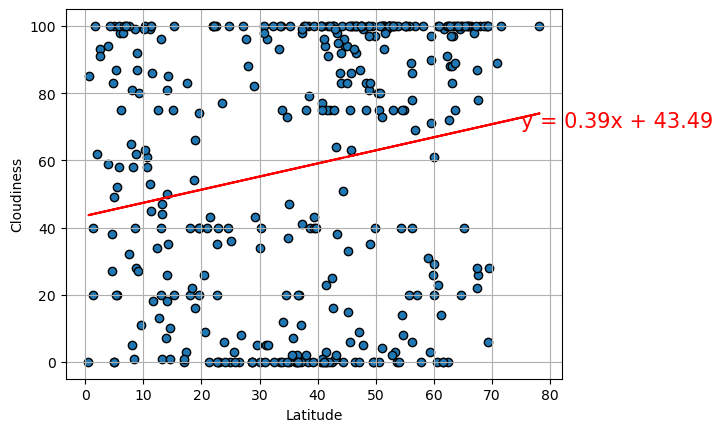

In [20]:
# Northern Hemisphere
x_value=northern_hemi_df["Lat"]
y_value=northern_hemi_df["Cloudiness"]
plot_linear_regression(x_value, y_value, "Cloudiness", (75,70))

the rvalue is  -0.07372843606106606


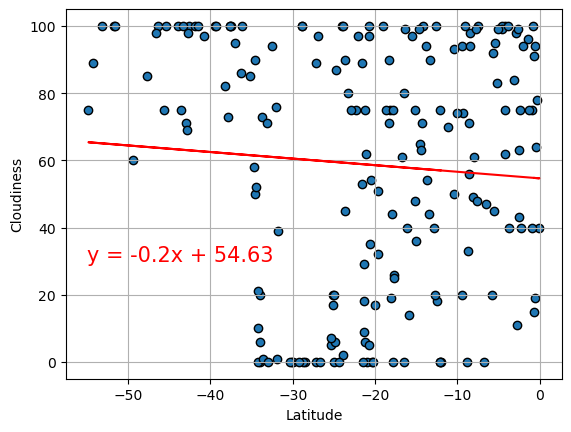

In [21]:
# Southern Hemisphere
x_value=southern_hemi_df["Lat"]
y_value=southern_hemi_df["Cloudiness"]
plot_linear_regression(x_value, y_value, "Cloudiness", (-55,30))

**Discussion about the linear relationship:** one neg and other one postive but still close to 0

### Wind Speed vs. Latitude Linear Regression Plot

the rvalue is  -0.037638631120840045


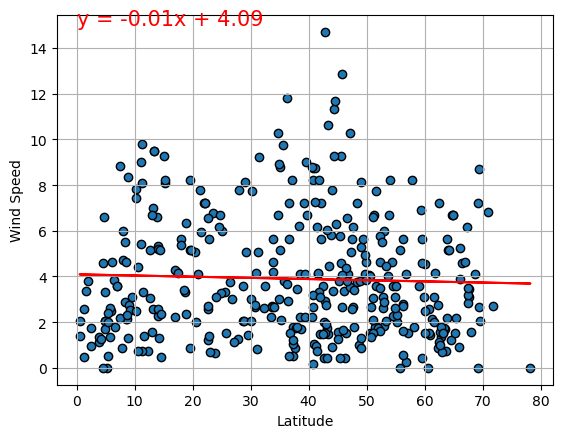

In [22]:
# Northern Hemisphere
x_value=northern_hemi_df["Lat"]
y_value=northern_hemi_df["Wind Speed"]
plot_linear_regression(x_value, y_value, "Wind Speed", (0,15))

the rvalue is  -0.21636094242368542


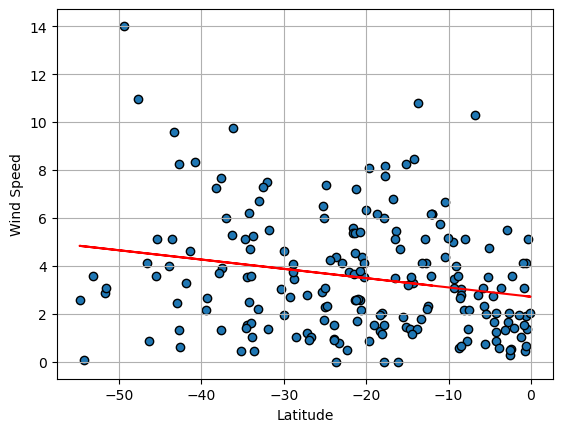

In [23]:
# Southern Hemisphere
x_value=southern_hemi_df["Lat"]
y_value=southern_hemi_df["Wind Speed"]
plot_linear_regression(x_value, y_value, "Wind Speed", (-55,15))

**Discussion about the linear relationship:** in north lat increase and wind increase but opposite in south they both decrease